This is just a short, simple decision tree classification model to train on it and understand some concepts 

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [47]:
df=pd.read_csv('https://raw.githubusercontent.com/mahesh147/Decision-Tree-Classifier/master/Social_Network_Ads.csv')

In [48]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [60]:
x=df.drop(['Gender'], axis='columns')
le=LabelEncoder()
y=le.fit_transform(df['Gender'])
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

In [115]:
max(x['EstimatedSalary'])

150000

In [61]:
print(len(x_train),len(y_train))

280 280


In [110]:
dtree=DecisionTreeClassifier(max_depth=4, min_samples_split=5,min_samples_leaf=3).fit(x_train, y_train)

In [111]:
ypredicttest=dtree.predict(x_test)
ypredicttrain=dtree.predict(x_train)

In [112]:
from sklearn.metrics import accuracy_score as asc
print(asc(y_test, ypredicttest))
print(asc(y_train, ypredicttrain))

0.4666666666666667
0.6678571428571428


In [113]:
dtree.classes_

array([0, 1])

In [119]:
print(classification_report(y_test,ypredicttest))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43        56
           1       0.50      0.50      0.50        64

    accuracy                           0.47       120
   macro avg       0.46      0.46      0.46       120
weighted avg       0.47      0.47      0.47       120



[Text(0.6363636363636364, 0.9, 'Age <= 49.5\ngini = 0.498\nsamples = 280\nvalue = [148, 132]'),
 Text(0.36363636363636365, 0.7, 'User ID <= 15745717.5\ngini = 0.5\nsamples = 240\nvalue = [117, 123]'),
 Text(0.18181818181818182, 0.5, 'User ID <= 15674276.0\ngini = 0.495\nsamples = 174\nvalue = [78, 96]'),
 Text(0.09090909090909091, 0.3, 'EstimatedSalary <= 72500.0\ngini = 0.498\nsamples = 96\nvalue = [51, 45]'),
 Text(0.045454545454545456, 0.1, 'gini = 0.452\nsamples = 55\nvalue = [36, 19]'),
 Text(0.13636363636363635, 0.1, 'gini = 0.464\nsamples = 41\nvalue = [15, 26]'),
 Text(0.2727272727272727, 0.3, 'User ID <= 15738804.0\ngini = 0.453\nsamples = 78\nvalue = [27, 51]'),
 Text(0.22727272727272727, 0.1, 'gini = 0.471\nsamples = 71\nvalue = [27, 44]'),
 Text(0.3181818181818182, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5454545454545454, 0.5, 'EstimatedSalary <= 110500.0\ngini = 0.483\nsamples = 66\nvalue = [39, 27]'),
 Text(0.45454545454545453, 0.3, 'User ID <= 15756876.0

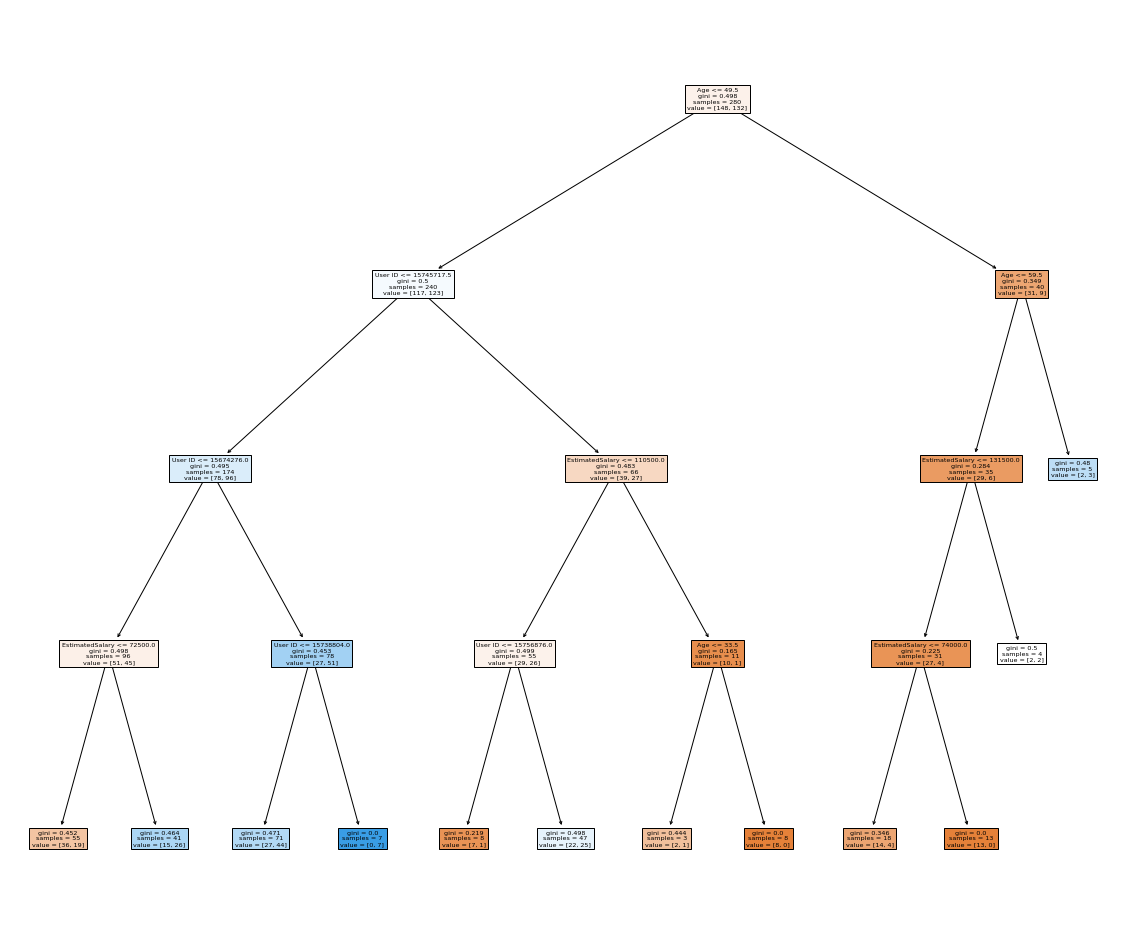

In [117]:
plt.figure(figsize=(20,17))
from sklearn import tree
tree.plot_tree(dtree,filled=True, feature_names=x.columns)